TRABAJAREMOS SOBRE UN DATASET CON DATOS DE CLIENTES DE UN BANCO.
LA IDEA ES APRENDER A RECONOCER LAS CARACTERÍSTICAS DE LOS CLIENTES MOROSOS, APRENDIENDO DE LAS CARACTERÍSTICAS DEL DATASET.
Los datos se han hecho anónimos para proteger la privacidad de los clientes.
 

In [1]:
# CARGAMOS LAS LIBRERÍAS QUE USAREMOS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from google.colab import files

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, validation_curve


warnings.filterwarnings("ignore")

In [ ]:
# SUBIMOS Y CARGAMOS EL DATASET
files.upload()

In [11]:
credito = pd.read_csv("credito.csv")
print(f'Forma: {credito.shape}')
print(f'Columnas: {credito.columns}')
credito

Forma: (1190, 26)
Columnas: Index(['ID', 'ingresos', 'edad', 'provincia_codigo', 'bancarizado',
       'BCRA_Peor_Situacion', 'Cantidad_consultas_7_dias',
       'Compromisos_Mensual', 'Endeudamiento_Externo', 'Nivel_Socioeconomico',
       'Deuda_normal', 'Deuda_30', 'Deuda_90', 'deuda_120', 'deuda_180',
       'canti_moras', 'autonomo', 'Es_jubilado', 'relacion_dependencia',
       'dias_atraso', 'Cuota', 'cant_cuotas', 'Monto_Otorgado', 'PRODUCTO',
       'PROVINCIA', 'moroso'],
      dtype='object')


ID  ingresos  edad provincia_codigo  bancarizado  BCRA_Peor_Situacion  \
0        1   35000.0    35                X            1                    1   
1        2   50000.0    24                B            1                    3   
2        3   50000.0    42                X            1                    1   
3        4   32000.0    21                H            1                    1   
4        5   50000.0    21                Z            1                    1   
...    ...       ...   ...              ...          ...                  ...   
1185  1186   50000.0    51                Q            0                    0   
1186  1187   46240.0    32                C            1                    1   
1187  1188   42866.0    21                B            1                    1   
1188  1189   17000.0    38                B            0                    0   
1189  1190  139300.0    50                B            1                    1   

      Cantidad_consultas_7_dias  Compromisos_Mensual  Endeudamiento_Externo  \
0                           1.0               9976.0               170000.0   
1                           0.0              16807.0               236000.0   
2                           5.0              42959.0               683343.0   
3                           3.0               7583.0                76000.0   
4                           4.0               1040.0                23000.0   
...                         ...                  ...                    ...   
1185                        0.0                  0.0                    0.0   
1186                        0.0               3010.0                49000.0   
1187                       18.0               3998.0                46000.0   
1188                        0.0                  0.0                    0.0   
1189                        1.0              36632.0               417950.0   

      Nivel_Socioeconomico  ...  autonomo  Es_jubilado  \
0                        4  ...         F            F   
1                        4  ...         F            F   
2                        3  ...         F            F   
3                        5  ...         F            F   
4                        5  ...         F            F   
...                    ...  ...       ...          ...   
1185                    -1  ...         0            0   
1186                     3  ...         F            F   
1187                     3  ...         F            F   
1188                    -1  ...         0            0   
1189                     4  ...         F            F   

                                   relacion_dependencia  dias_atraso    Cuota  \
0     UNIVERSIDAD NACIONAL DE CORDOBA               ...          143  8957.00   
1     POLICIA FEDERAL ARGENTINA                     ...          174  6874.49   
2     MINISTERIO DE EDUCACION                       ...            0  4191.93   
3     CONTADURIA GENERAL DEL EJERCITO               ...           23  3667.60   
4     CONTADURIA GENERAL DEL EJERCITO               ...            0  3891.04   
...                                                 ...          ...      ...   
1185                                                  0            0  5557.65   
1186  POLICIA FEDERAL ARGENTINA                     ...            0  2594.03   
1187                                  SANOFI PASTEUR SA           58  8957.10   
1188                                                  0           28  7633.03   
1189  DIRECCION GENERAL DE CULTURA Y EDUCACIONDE LA ...            0  9404.96   

      cant_cuotas Monto_Otorgado           PRODUCTO        PROVINCIA  moroso  
0              12        50000.0    DS_SUCURSAL_ORO          CORDOBA       1  
1               9        25000.0          DS_BASICO     BUENOS AIRES       1  
2              12        23400.0    DS_SUCURSAL_ORO          CORDOBA       0  
3              12        16000.0          DS_BASICO            CHACO       0  
4               6    

In [4]:
credito.info()   # descripción del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         1190 non-null   int64  
 1   ingresos                   1190 non-null   float64
 2   edad                       1190 non-null   int64  
 3   provincia_codigo           1190 non-null   object 
 4   bancarizado                1190 non-null   int64  
 5   BCRA_Peor_Situacion        1190 non-null   int64  
 6   Cantidad_consultas_7_dias  1189 non-null   float64
 7   Compromisos_Mensual        1190 non-null   float64
 8   Endeudamiento_Externo      1190 non-null   float64
 9   Nivel_Socioeconomico       1190 non-null   int64  
 10  Deuda_normal               1190 non-null   float64
 11  Deuda_30                   1190 non-null   float64
 12  Deuda_90                   1190 non-null   float64
 13  deuda_120                  1190 non-null   float

In [5]:
credito.describe().T   # estadísticos

count           mean            std      min  \
ID                         1190.0     595.500000     343.667717      1.0   
ingresos                   1190.0   53437.669538   43665.378404  12924.0   
edad                       1190.0      43.843697      13.781331     18.0   
bancarizado                1190.0       0.642017       0.479609      0.0   
BCRA_Peor_Situacion        1190.0       0.889076       1.231544     -1.0   
Cantidad_consultas_7_dias  1189.0       1.879731       2.768540      0.0   
Compromisos_Mensual        1190.0    9321.036134   14235.963408      0.0   
Endeudamiento_Externo      1190.0  152621.008403  240678.479013      0.0   
Nivel_Socioeconomico       1190.0       2.902521       2.750135     -1.0   
Deuda_normal               1190.0  150607.071429  239969.973391      0.0   
Deuda_30                   1190.0     295.798319    2973.654857      0.0   
Deuda_90                   1190.0     230.252101    4059.162032      0.0   
deuda_120                  1190.0     136.974790    1622.143114      0.0   
deuda_180                  1190.0    1350.911765    8560.028313      0.0   
canti_moras                1190.0       0.094118       0.359257      0.0   
dias_atraso                1190.0      47.553782      56.008605      0.0   
Cuota                      1190.0    6756.267050    3738.927120   1350.9   
cant_cuotas                1190.0      11.636975       3.151511      6.0   
Monto_Otorgado             1190.0   34026.899269   20263.219795   5000.0   
moroso                     1190.0       0.226050       0.418448      0.0   

                                  25%       50%        75%         max  
ID                           298.2500    595.50     892.75     1190.00  
ingresos                   33539.6175  47000.00   63000.00   930000.00  
edad                          33.0000     42.00      53.00      121.00  
bancarizado                    0.0000      1.00       1.00        1.00  
BCRA_Peor_Situacion            0.0000      1.00       1.00        5.00  
Cantidad_consultas_7_dias      0.0000      1.00       3.00       18.00  
Compromisos_Mensual            0.0000   3639.00   13106.00   177911.00  
Endeudamiento_Externo          0.0000  54011.50  227061.25  3206484.00  
Nivel_Socioeconomico          -1.0000      4.00       5.00        7.00  
Deuda_normal                   0.0000  53000.00  223000.00  3206484.00  
Deuda_30                       0.0000      0.00       0.00    44000.00  
Deuda_90                       0.0000      0.00       0.00   128000.00  
deuda_120                      0.0000      0.00       0.00    38000.00  
deuda_180                      0.0000      0.00       0.00   157000.00  
canti_moras                    0.0000      0.00       0.00        3.00  
dias_atraso                    0.0000     23.00      89.00      183.00  
Cuota                       3851.3900   5699.62    8757.73    24934.57  
cant_cuotas                    9.0000     12.00      15.00       15.00  
Monto_Otorgado             19981.2500  28000.00   50000.00   120000.00  
moroso                         0.0000      0.00       0.00        1.00

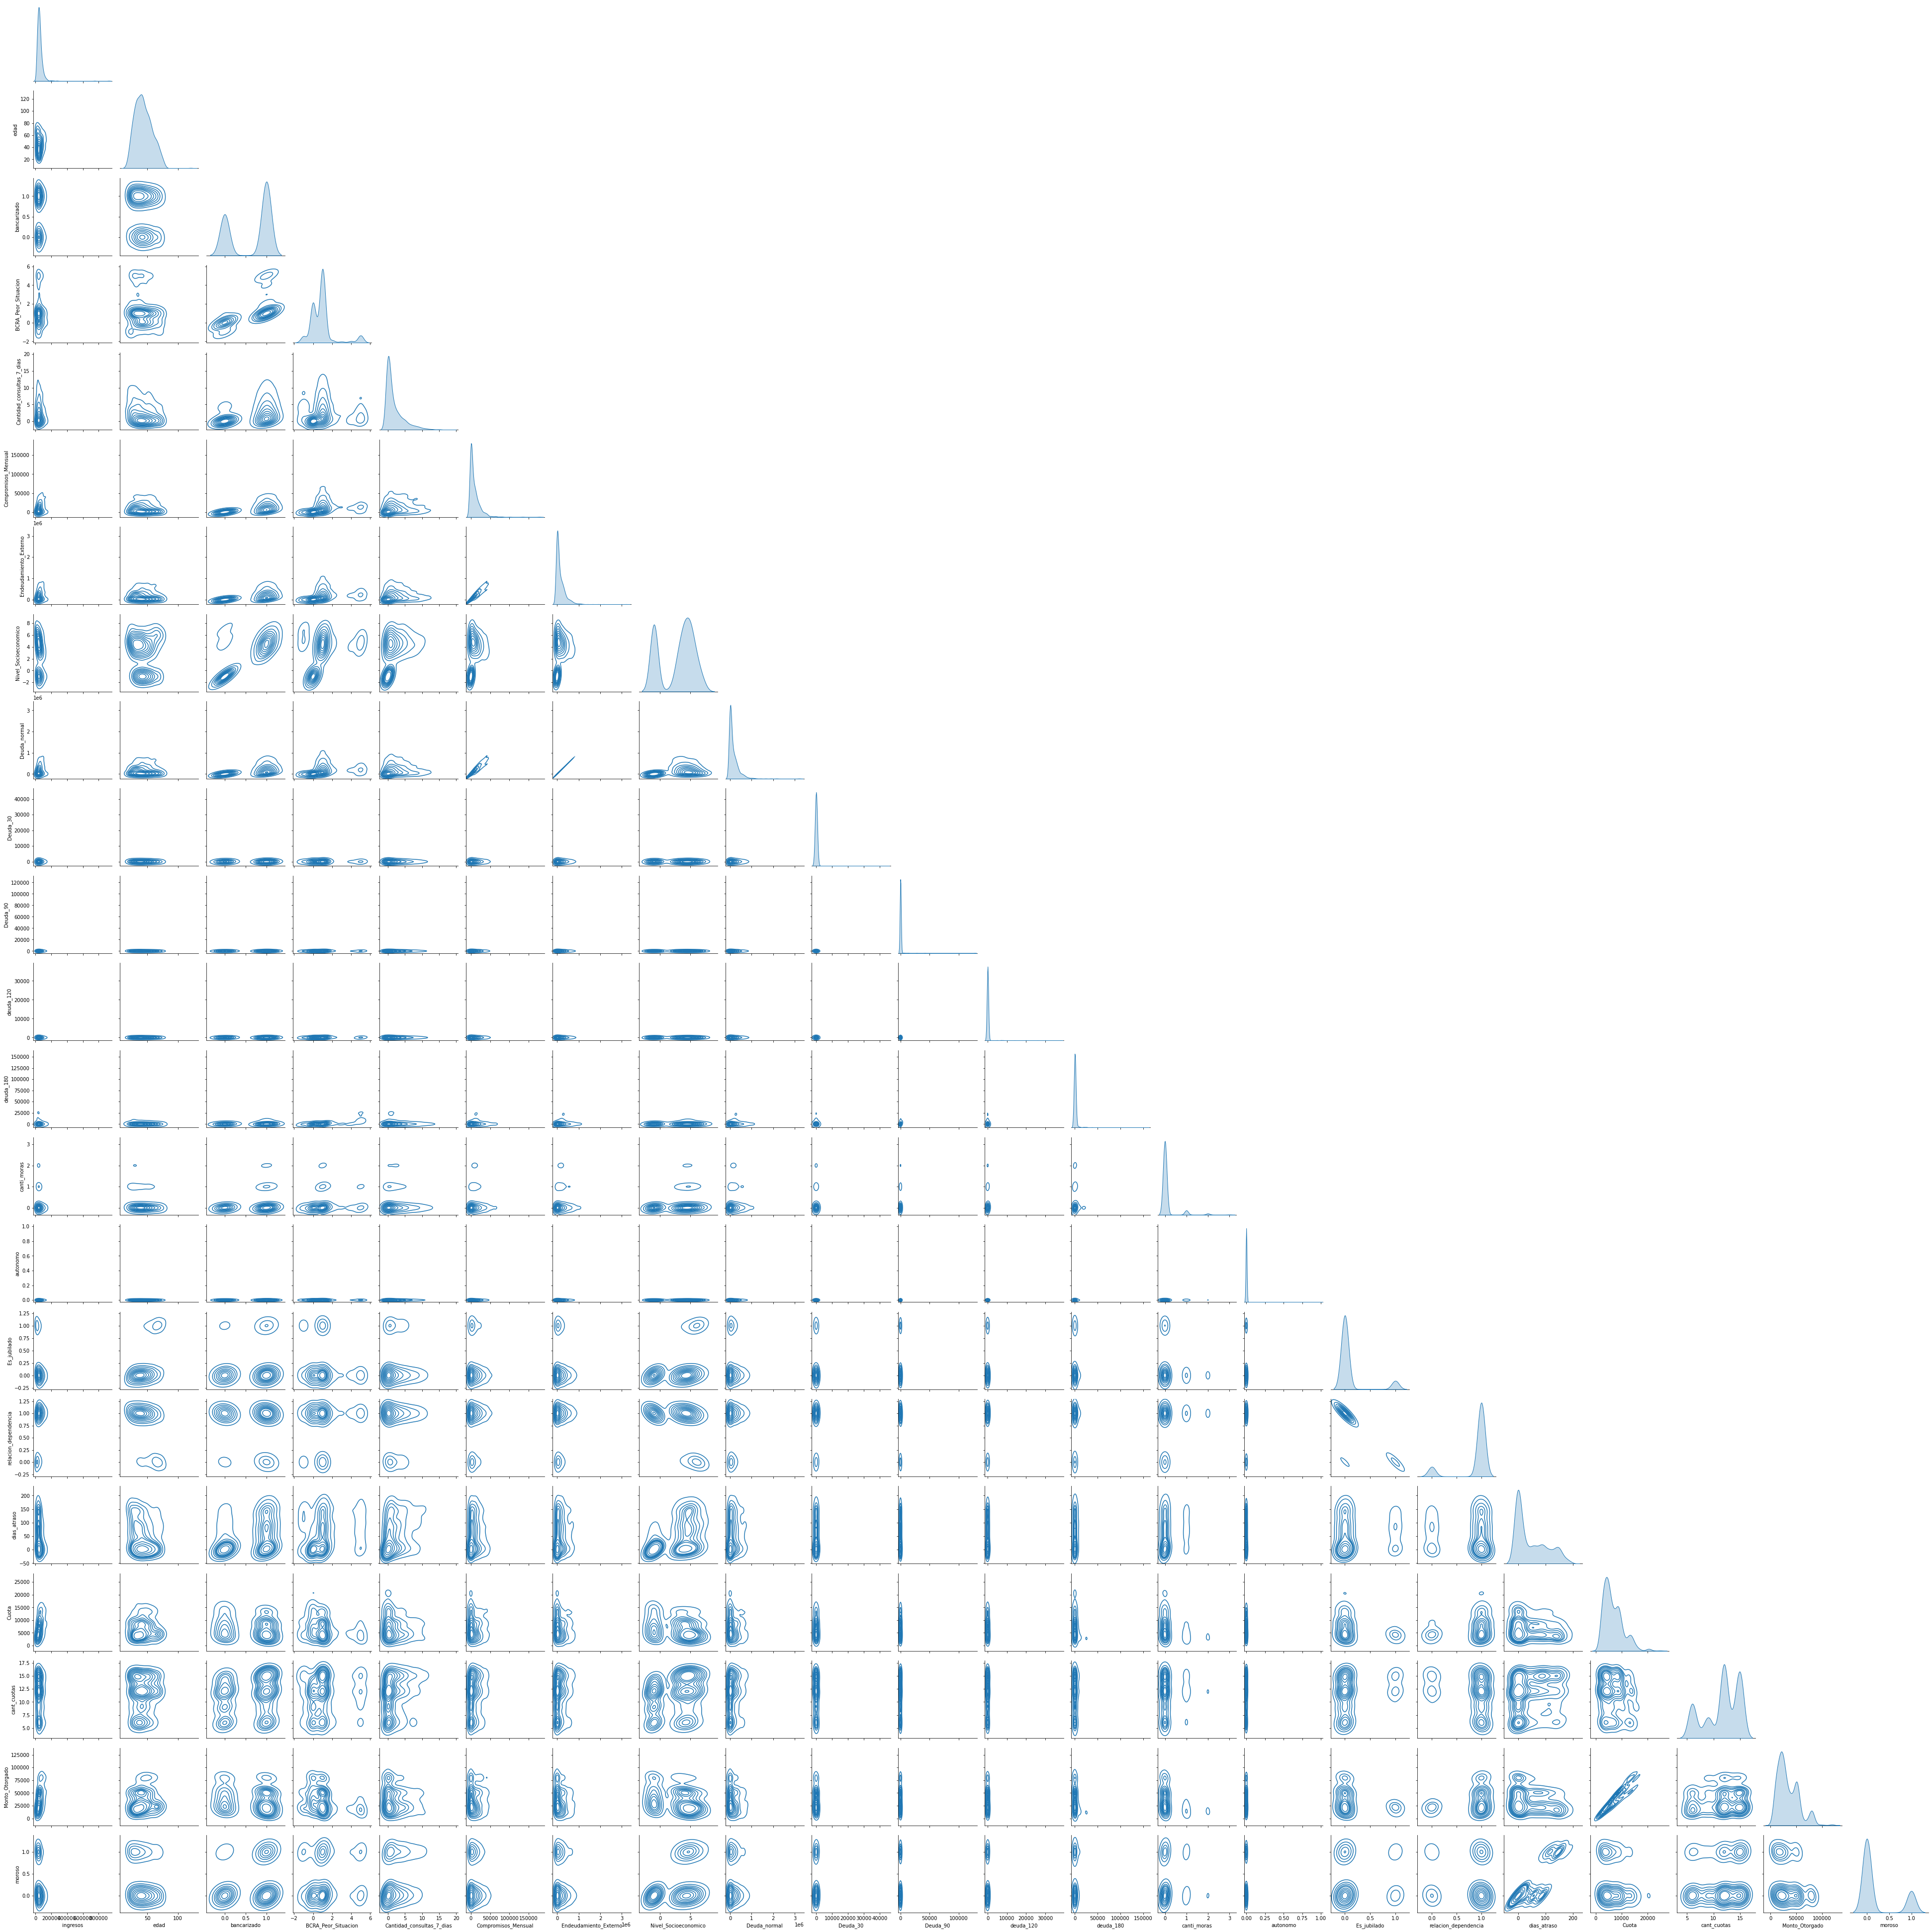

In [ ]:
# Veamos qué 'pinta' tiene el dataset
sns.pairplot(credito, kind='kde', corner=True)   # tarda una vida!!!!

In [6]:
# VEMOS SI HAY VALORES NULL O NaN
print(f"¿Tiene datos en null o NaN? {credito.isnull().any().any()}")
print("¿Qué columnas poseen null o NaN?")
display(credito.isnull().any())
# TAMBIÉN SE PUEDE PREGUNTAR
print(f'Cuántos registros ausentes hay?\n{credito.isnull().sum()}')

¿Tiene datos en null o NaN? True
¿Qué columnas poseen null o NaN?


ID                           False
ingresos                     False
edad                         False
provincia_codigo             False
bancarizado                  False
BCRA_Peor_Situacion          False
Cantidad_consultas_7_dias     True
Compromisos_Mensual          False
Endeudamiento_Externo        False
Nivel_Socioeconomico         False
Deuda_normal                 False
Deuda_30                     False
Deuda_90                     False
deuda_120                    False
deuda_180                    False
canti_moras                  False
autonomo                     False
Es_jubilado                  False
relacion_dependencia          True
dias_atraso                  False
Cuota                        False
cant_cuotas                  False
Monto_Otorgado               False
PRODUCTO                     False
PROVINCIA                    False
moroso                       False
dtype: bool

Cuántos registros ausentes hay?
ID                             0
ingresos                       0
edad                           0
provincia_codigo               0
bancarizado                    0
BCRA_Peor_Situacion            0
Cantidad_consultas_7_dias      1
Compromisos_Mensual            0
Endeudamiento_Externo          0
Nivel_Socioeconomico           0
Deuda_normal                   0
Deuda_30                       0
Deuda_90                       0
deuda_120                      0
deuda_180                      0
canti_moras                    0
autonomo                       0
Es_jubilado                    0
relacion_dependencia         138
dias_atraso                    0
Cuota                          0
cant_cuotas                    0
Monto_Otorgado                 0
PRODUCTO                       0
PROVINCIA                      0
moroso                         0
dtype: int64


In [12]:
# HAY QUE EMPEZAR A TOMAR DECISIONES SOBRE LOS DATOS
# ASIGNAMOS LA COLUMNA 'ID' COMO ÍNDICE DEL DATAFRAME
credito.set_index(['ID'], inplace = True)
# TENEMOS 2 COLUMNAS QUE DESCRIBEN LO MISMO, LA PROVINCIA. ASÍ QUE NOS QUEDAREMOS CON UNA SOLA y eliminaremos la otra
credito.drop(['provincia_codigo'], axis = 1, inplace = True)
print(credito.shape)
credito


(1190, 24)


ingresos  edad  bancarizado  BCRA_Peor_Situacion  \
ID                                                       
1      35000.0    35            1                    1   
2      50000.0    24            1                    3   
3      50000.0    42            1                    1   
4      32000.0    21            1                    1   
5      50000.0    21            1                    1   
...        ...   ...          ...                  ...   
1186   50000.0    51            0                    0   
1187   46240.0    32            1                    1   
1188   42866.0    21            1                    1   
1189   17000.0    38            0                    0   
1190  139300.0    50            1                    1   

      Cantidad_consultas_7_dias  Compromisos_Mensual  Endeudamiento_Externo  \
ID                                                                            
1                           1.0               9976.0               170000.0   
2                           0.0              16807.0               236000.0   
3                           5.0              42959.0               683343.0   
4                           3.0               7583.0                76000.0   
5                           4.0               1040.0                23000.0   
...                         ...                  ...                    ...   
1186                        0.0                  0.0                    0.0   
1187                        0.0               3010.0                49000.0   
1188                       18.0               3998.0                46000.0   
1189                        0.0                  0.0                    0.0   
1190                        1.0              36632.0               417950.0   

      Nivel_Socioeconomico  Deuda_normal  Deuda_30  ...  autonomo  \
ID                                                  ...             
1                        4      170000.0       0.0  ...         F   
2                        4      187000.0       0.0  ...         F   
3                        3      683343.0       0.0  ...         F   
4                        5       76000.0       0.0  ...         F   
5                        5       23000.0       0.0  ...         F   
...                    ...           ...       ...  ...       ...   
1186                    -1           0.0       0.0  ...         0   
1187                     3       49000.0       0.0  ...         F   
1188                     3       46000.0       0.0  ...         F   
1189                    -1           0.0       0.0  ...         0   
1190                     4      417950.0       0.0  ...         F   

      Es_jubilado                               relacion_dependencia  \
ID                                                                     
1               F  UNIVERSIDAD NACIONAL DE CORDOBA               ...   
2               F  POLICIA FEDERAL ARGENTINA                     ...   
3               F  MINISTERIO DE EDUCACION                       ...   
4               F  CONTADURIA GENERAL DEL EJERCITO               ...   
5               F  CONTADURIA GENERAL DEL EJERCITO               ...   
...           ...                                                ...   
1186            0                                                  0   
1187            F  POLICIA FEDERAL ARGENTINA                     ...   
1188            F                                  SANOFI PASTEUR SA   
1189            0                                                  0   
1190            F  DIRECCION GENERAL DE CULTURA Y EDUCACIONDE LA ...   

      dias_atraso    Cuota cant_cuotas Monto_Otorgado           PRODUCTO  \
ID                                                                         
1             143  8957.00          12        50000.0    DS_SUCURSAL_ORO   
2             174  6874.49           9        25000.0          DS_BASICO   
3               0  4191.93          12        23400.0    DS_SUCURSAL_ORO   
4       

In [13]:
# VEAMOS QUÉ VALORES HAY EN 'autonomo' Y 'Es_jubilado'
print(credito['autonomo'].unique())
print(credito['Es_jubilado'].unique())


['F' '0' 'V']
['F' 'V' '0']


In [14]:
# TENEMOS INCONSISTENCIAS EN LOS DATOS EN 'autonomo' Y 'Es_jubilado'. A corregirlas
# DESPUÉS VEMOS QUÉ HACER CON LOS NaN/NULL
credito['autonomo'] = credito.autonomo.map({'F': 0, 'V': 1, '0':0})
credito['Es_jubilado'] = credito.Es_jubilado.map({'F': 0, 'V': 1, '0':0})
print(credito['autonomo'].dtype)
print(credito['Es_jubilado'].dtype)
print(credito['autonomo'].unique())
print(credito['Es_jubilado'].unique())

credito.info()

int64
int64
[0 1]
[0 1]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 1 to 1190
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos                   1190 non-null   float64
 1   edad                       1190 non-null   int64  
 2   bancarizado                1190 non-null   int64  
 3   BCRA_Peor_Situacion        1190 non-null   int64  
 4   Cantidad_consultas_7_dias  1189 non-null   float64
 5   Compromisos_Mensual        1190 non-null   float64
 6   Endeudamiento_Externo      1190 non-null   float64
 7   Nivel_Socioeconomico       1190 non-null   int64  
 8   Deuda_normal               1190 non-null   float64
 9   Deuda_30                   1190 non-null   float64
 10  Deuda_90                   1190 non-null   float64
 11  deuda_120                  1190 non-null   float64
 12  deuda_180                  1190 non-null   float64
 13  canti_moras             

In [15]:
# VEMOS QUE HAY VALORES AUSENTES EN LAS COLUMNAS 'autonomo', 'Es_jubilado' Y 'relacion_dependencia'
# VAMOS A SUPONER QUE ESOS VALORES AUSENTES CORRESPONDEN A VALORES 0 (PARECE RAZONABLE)
# Es una decisión mía. Pero si pudiera hablar con el cliente, debería averiguar cuál es el caso real, 
# pues puede que sean datos ausentes que no se tienen y en ese caso, debería quizás eliminar los registros completos
# ENTONCES RELLENO ESAS COLUMNAS CON 0'S y con esto, ya terminé de asignar valores a los datos ausentes
credito.fillna(0, inplace = True)
credito.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 1 to 1190
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos                   1190 non-null   float64
 1   edad                       1190 non-null   int64  
 2   bancarizado                1190 non-null   int64  
 3   BCRA_Peor_Situacion        1190 non-null   int64  
 4   Cantidad_consultas_7_dias  1190 non-null   float64
 5   Compromisos_Mensual        1190 non-null   float64
 6   Endeudamiento_Externo      1190 non-null   float64
 7   Nivel_Socioeconomico       1190 non-null   int64  
 8   Deuda_normal               1190 non-null   float64
 9   Deuda_30                   1190 non-null   float64
 10  Deuda_90                   1190 non-null   float64
 11  deuda_120                  1190 non-null   float64
 12  deuda_180                  1190 non-null   float64
 13  canti_moras                1190 non-null   int64

In [16]:
# REVISAMOS LOS VALORES EN 'autonomo', 'Es_jubilado' Y 'relacion_dependencia'
print(credito.autonomo.value_counts())
print(credito.Es_jubilado.value_counts())
print(credito.relacion_dependencia.value_counts())
credito.dtypes
# 'autonomo' y 'Es_jubilado' ya quedaron bien

0    1189
1       1
Name: autonomo, dtype: int64
0    1068
1     122
Name: Es_jubilado, dtype: int64
0                                                               359
0                                                               138
SUPERIOR GOBIERNO DE LA PCIA DE TUCUMAN                          72
CONTADURIA GENERAL DEL EJERCITO                                  60
PROVINCIA DE SALTA                                               46
                                                               ... 
IPLYC CONFORT CREDITOS Y SERVICIOS SOCIEDAD DEL ESTADO            1
MATERNOS S R L                                                    1
MUNICIPALIDAD DE SAN PATRICIO DEL CHAÃ°AR                         1
HONORABLE CONSEJO DELIBERANTE DE LA CIUDAD DE POSADAS             1
SANOFI PASTEUR SA                                                 1
Name: relacion_dependencia, Length: 199, dtype: int64


ingresos                     float64
edad                           int64
bancarizado                    int64
BCRA_Peor_Situacion            int64
Cantidad_consultas_7_dias    float64
Compromisos_Mensual          float64
Endeudamiento_Externo        float64
Nivel_Socioeconomico           int64
Deuda_normal                 float64
Deuda_30                     float64
Deuda_90                     float64
deuda_120                    float64
deuda_180                    float64
canti_moras                    int64
autonomo                       int64
Es_jubilado                    int64
relacion_dependencia          object
dias_atraso                    int64
Cuota                        float64
cant_cuotas                    int64
Monto_Otorgado               float64
PRODUCTO                      object
PROVINCIA                     object
moroso                         int64
dtype: object

In [17]:
# Quuiero saber cuántos valores distintos tiene 'relacion_dependencia' (son los nombres de esos lugares)
print(f'Número de Categorías: { credito.relacion_dependencia.nunique() }')
# hay 199

Número de Categorías: 199


In [18]:
# TENEMOS 3 COLUMNAS DE TIPO 'object' 
# PARA 'PROVINCIA' Y 'PRODUCTO' PARECE ADECUADO APLICAR UN ENCODER tipo OneHotEncoder
# PERO 'relacion_dependencia' DESCRIBE CADA LUGAR DE TRABAJO. SIN EMBARGO, NO PARECE IMPORTANTE ESTE HECHO, 
# MEJOR IDENTIFICAR EL TIPO DE ACTIVIDAD DE CADA CLIENTE
# ENTONCES, PARECE MEJOR ASIGNAR 1 AL QUE SEA EMPLEADO Y 0 A QUIEN NO LO SEA
# POR OTRO LADO, EN 'BCRA_Peor_Situacion' SÍ TENEMOS CATEGORÍAS, AUNQUE LA VARIABLE SEA ENTERA. 
# lO MISMO EN 'Nivel_Socioeconomico'. ENTONCES PARECE RAZONABLE CODIFICARLOS tipo OneHot
credito['relacion_dependencia'].mask(credito['relacion_dependencia']!=0, 1, inplace=True)
print(credito.relacion_dependencia.value_counts())
print('BCRA\n',credito.BCRA_Peor_Situacion.value_counts())
print('NivSE\n',credito.Nivel_Socioeconomico.value_counts())
credito.info()


1    1052
0     138
Name: relacion_dependencia, dtype: int64
BCRA
  1    663
 0    359
 5     65
-1     58
 2     21
 4     14
 3     10
Name: BCRA_Peor_Situacion, dtype: int64
NivSE
 -1    359
 5    255
 4    240
 3    141
 6    127
 7     52
 2     13
 1      3
Name: Nivel_Socioeconomico, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 1 to 1190
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos                   1190 non-null   float64
 1   edad                       1190 non-null   int64  
 2   bancarizado                1190 non-null   int64  
 3   BCRA_Peor_Situacion        1190 non-null   int64  
 4   Cantidad_consultas_7_dias  1190 non-null   float64
 5   Compromisos_Mensual        1190 non-null   float64
 6   Endeudamiento_Externo      1190 non-null   float64
 7   Nivel_Socioeconomico       1190 non-null   int64  
 8   Deuda_normal           

In [19]:
# AHORA APLICAREMOS EL CODIFICADO. PANDAS TIENE UN MÉTODO LLAMADO GET_DUMMIES QUE HACE LO MISMO QUE OneHot
# (y no vamos a necesitar hacer conversiones de matrices de np a dataframe y de vuelta)
# PRIMERO HAY CAMBIAR EL TIPO DE LAS COLUMNAS A TRANSFORMAR A 'object' O 'category' 

columnas_cod=['PRODUCTO', 'PROVINCIA', 'BCRA_Peor_Situacion', 'Nivel_Socioeconomico']
# asignamos los tipos correctos
credito[columnas_cod] = credito[columnas_cod].astype(str)
credito[['relacion_dependencia', 'autonomo', 'Es_jubilado']]=credito[['relacion_dependencia', 'autonomo', 'Es_jubilado']].astype(int)  #  son enteros pero sin tipo int 
credito.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 1 to 1190
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ingresos                   1190 non-null   float64
 1   edad                       1190 non-null   int64  
 2   bancarizado                1190 non-null   int64  
 3   BCRA_Peor_Situacion        1190 non-null   object 
 4   Cantidad_consultas_7_dias  1190 non-null   float64
 5   Compromisos_Mensual        1190 non-null   float64
 6   Endeudamiento_Externo      1190 non-null   float64
 7   Nivel_Socioeconomico       1190 non-null   object 
 8   Deuda_normal               1190 non-null   float64
 9   Deuda_30                   1190 non-null   float64
 10  Deuda_90                   1190 non-null   float64
 11  deuda_120                  1190 non-null   float64
 12  deuda_180                  1190 non-null   float64
 13  canti_moras                1190 non-null   int64

In [20]:
#AHORA SI! a codificar
credito=pd.get_dummies(credito, dtype=int)
credito.info()
credito

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1190 entries, 1 to 1190
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ingresos                       1190 non-null   float64
 1   edad                           1190 non-null   int64  
 2   bancarizado                    1190 non-null   int64  
 3   Cantidad_consultas_7_dias      1190 non-null   float64
 4   Compromisos_Mensual            1190 non-null   float64
 5   Endeudamiento_Externo          1190 non-null   float64
 6   Deuda_normal                   1190 non-null   float64
 7   Deuda_30                       1190 non-null   float64
 8   Deuda_90                       1190 non-null   float64
 9   deuda_120                      1190 non-null   float64
 10  deuda_180                      1190 non-null   float64
 11  canti_moras                    1190 non-null   int64  
 12  autonomo                       1190 non-null   i

ingresos  edad  bancarizado  Cantidad_consultas_7_dias  \
ID                                                             
1      35000.0    35            1                        1.0   
2      50000.0    24            1                        0.0   
3      50000.0    42            1                        5.0   
4      32000.0    21            1                        3.0   
5      50000.0    21            1                        4.0   
...        ...   ...          ...                        ...   
1186   50000.0    51            0                        0.0   
1187   46240.0    32            1                        0.0   
1188   42866.0    21            1                       18.0   
1189   17000.0    38            0                        0.0   
1190  139300.0    50            1                        1.0   

      Compromisos_Mensual  Endeudamiento_Externo  Deuda_normal  Deuda_30  \
ID                                                                         
1                  9976.0               170000.0      170000.0       0.0   
2                 16807.0               236000.0      187000.0       0.0   
3                 42959.0               683343.0      683343.0       0.0   
4                  7583.0                76000.0       76000.0       0.0   
5                  1040.0                23000.0       23000.0       0.0   
...                   ...                    ...           ...       ...   
1186                  0.0                    0.0           0.0       0.0   
1187               3010.0                49000.0       49000.0       0.0   
1188               3998.0                46000.0       46000.0       0.0   
1189                  0.0                    0.0           0.0       0.0   
1190              36632.0               417950.0      417950.0       0.0   

      Deuda_90  deuda_120  ...  PROVINCIA_NEUQUEN  PROVINCIA_RIO NEGRO  \
ID                         ...                                           
1          0.0        0.0  ...                  0                    0   
2      11000.0        0.0  ...                  0                    0   
3          0.0        0.0  ...                  0                    0   
4          0.0        0.0  ...                  0                    0   
5          0.0        0.0  ...                  0                    0   
...        ...        ...  ...                ...                  ...   
1186       0.0        0.0  ...                  1                    0   
1187       0.0        0.0  ...                  0                    0   
1188       0.0        0.0  ...                  0                    0   
1189       0.0        0.0  ...                  0                    0   
1190       0.0        0.0  ...                  0                    0   

      PROVINCIA_SALTA  PROVINCIA_SAN JUAN  PROVINCIA_SAN LUIS  \
ID                                                              
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   
5                   0                   0                   0   
...               ...                 ...                 ...   
1186                0                   0                   0   
1187                0                   0                   0   
1188                0                   0                   0   
1189                0                   0                   0   
1190                0                   0                   0   

      PROVINCIA_SANTA CRUZ  PROVINCIA_SANTA FE  PROVINCIA_SANTIAGO DEL ESTERO  \
ID                                                                              
1                        0                   0                              0   
2                        0                   0                              0   
3                        0                   0     

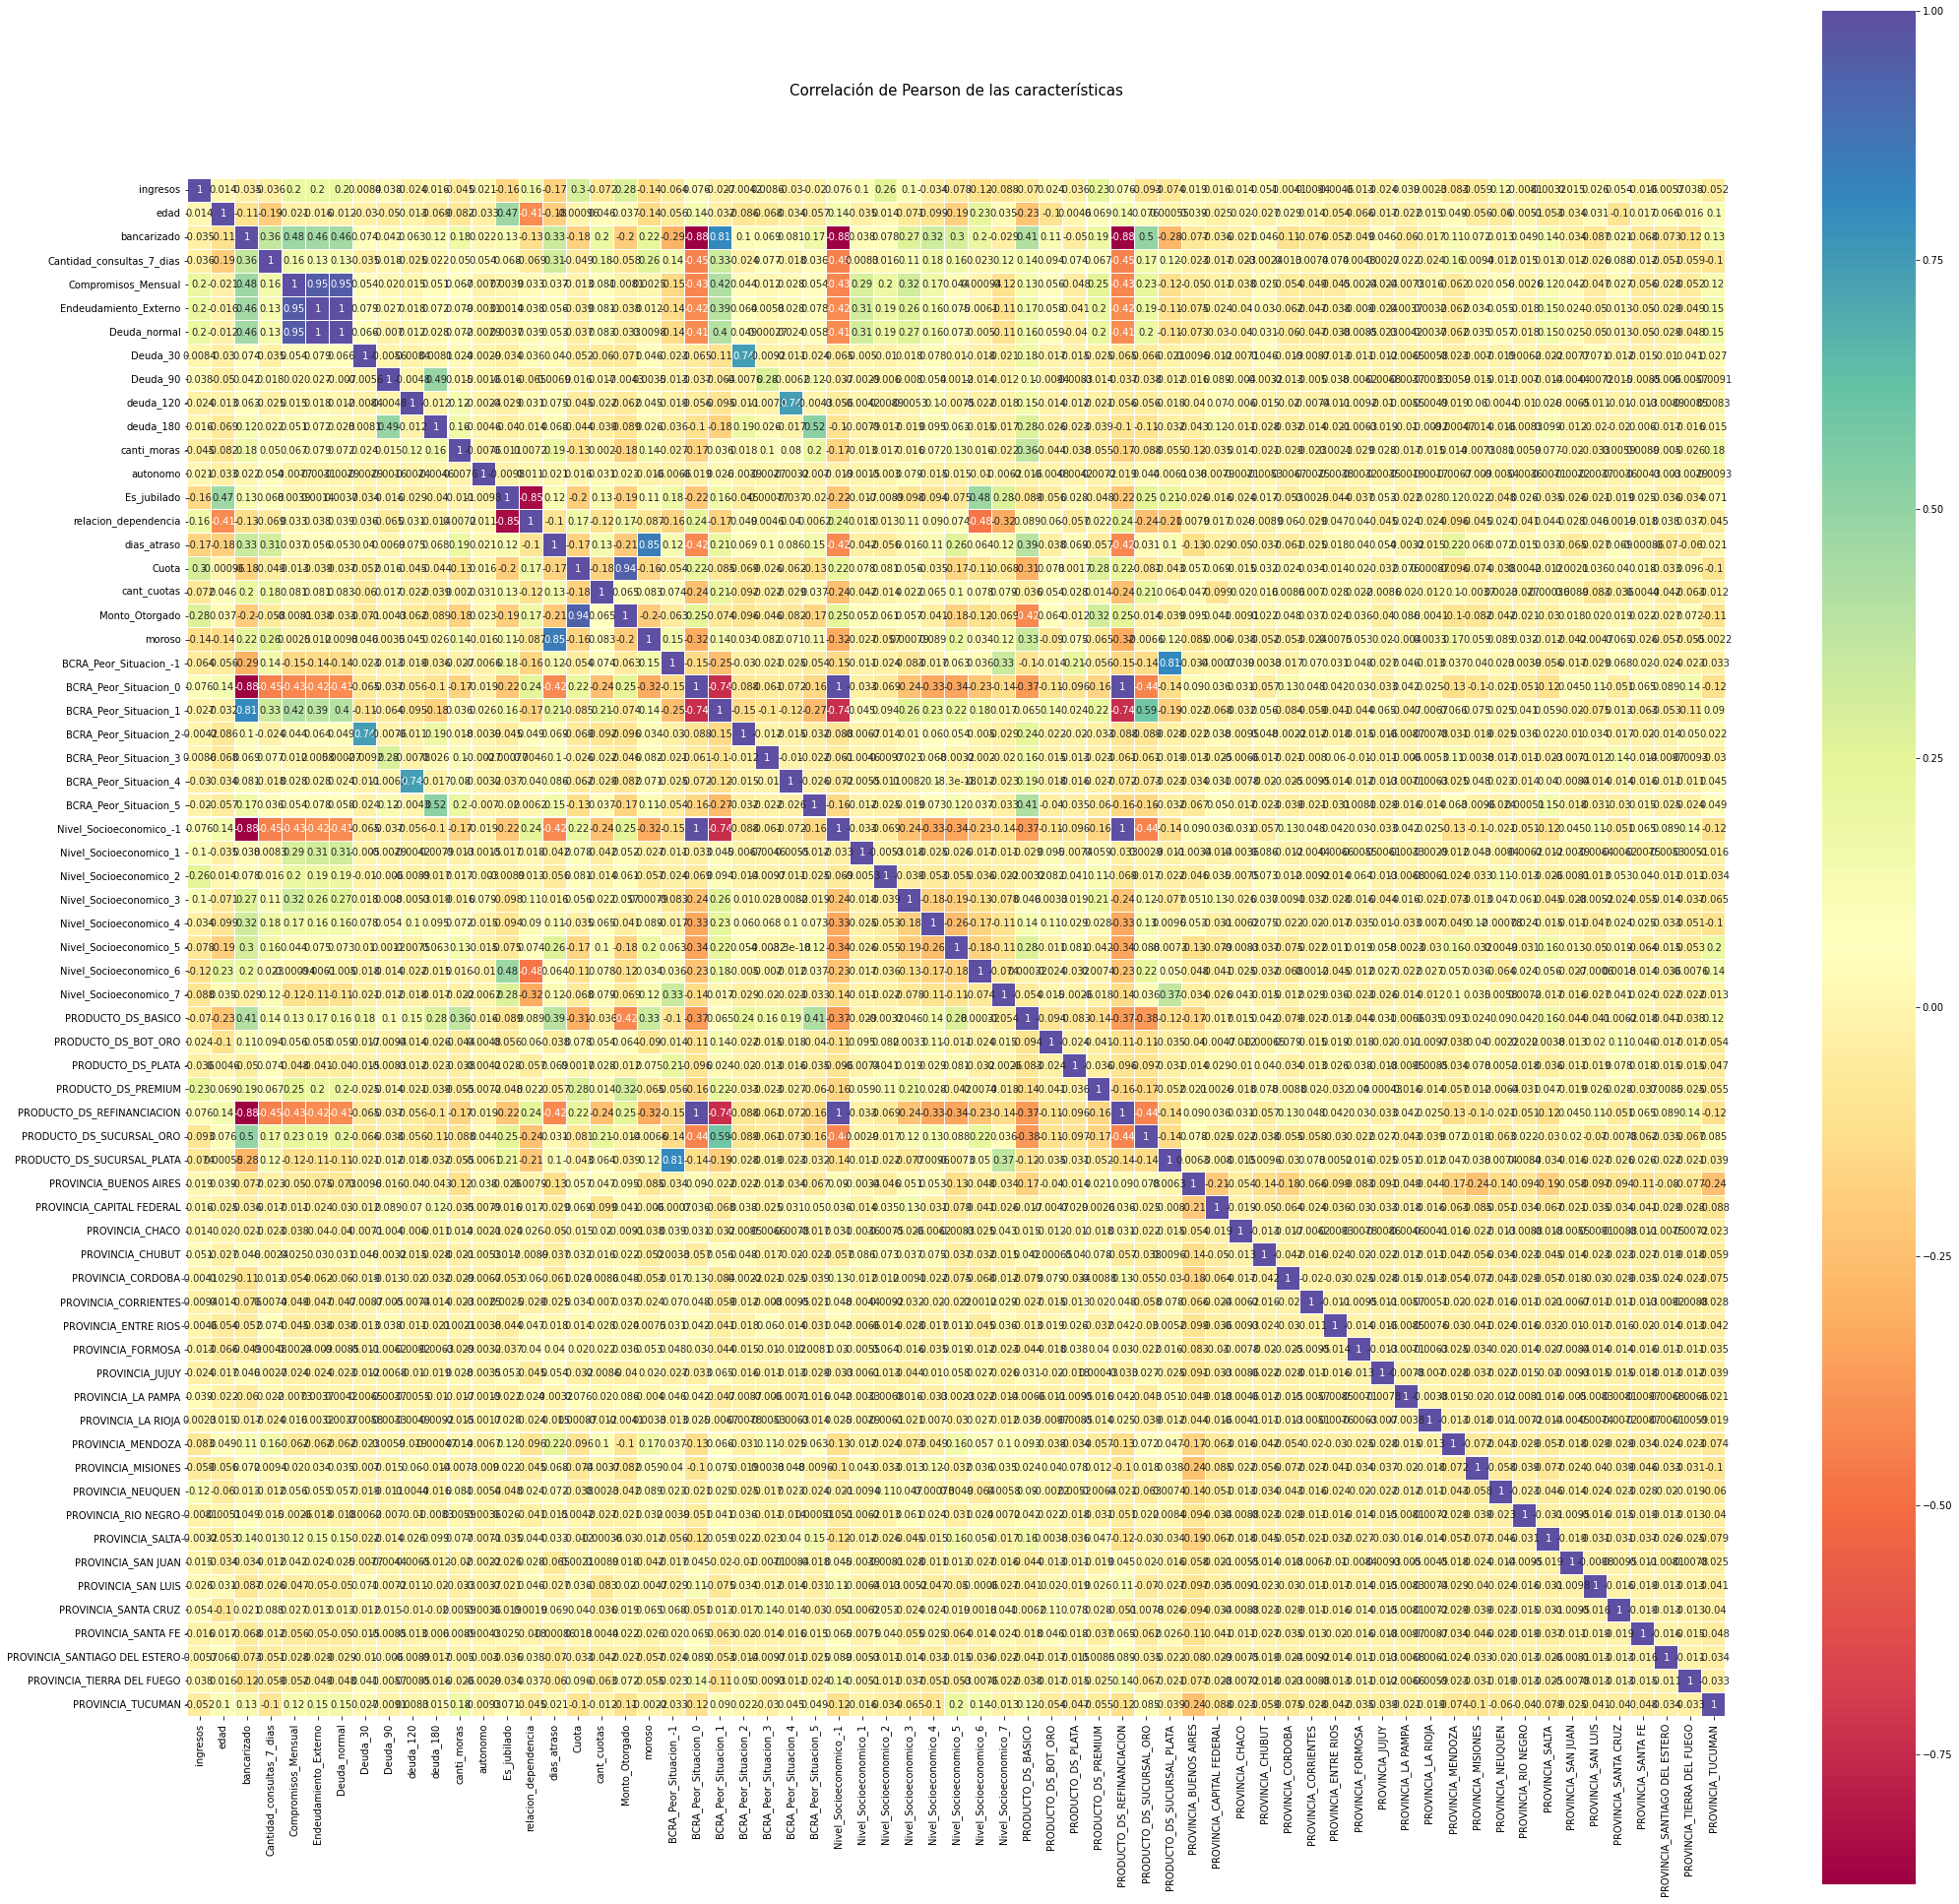

In [ ]:
# VEMOS COMO QUEDARON LAS correlaciones EN EL DATASET. 

plt.figure(figsize = (35,35))
plt.title('Correlación de Pearson de las características', y = 1.05, size = 15)
sns.heatmap(credito.corr(), linewidths = 0.1, vmax = 1.0, square = True,
            cmap = 'Spectral',linecolor = 'white', annot = True)
plt.show()


moroso
0    921
1    269
dtype: int64


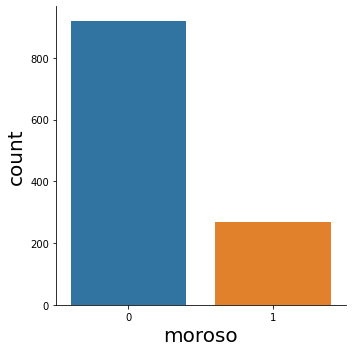

In [21]:
# Veamos como está distribuida la categoría target 'moroso'
parameters = {'axes.labelsize': 20,
          'axes.titlesize': 20}
plt.rcParams.update(parameters)

print(credito.groupby('moroso').size())
sns.catplot('moroso', data = credito, kind = "count")
# Existe desbalance entre ambas características

In [22]:
# Ya está listo el dataset para buscar y entrenar modelos
# Falta estandarizar las características
# Vamos a usar un ÁRBOL Y UN RANDOM FOREST
# Primero separamos en train y test
# Copiamos el dataframe original para no perder nada en otro y trabajamos sobre el otro

cred=credito.copy()   # lo preservamos
y=np.array(cred['moroso'])    # definimos variable target
X=np.array(cred.drop(['moroso'],1))   # definimos dataset de características puras
# stratify=y hace que respete la distribución de las clases en y para muestrear
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, 
                                                    random_state = 16)   


In [23]:
X_train.shape

(952, 64)

tn, fp, fn, tp = [184   0   0  54]
Val_accuracy = 100.0 %
OOB Score = 99.58%


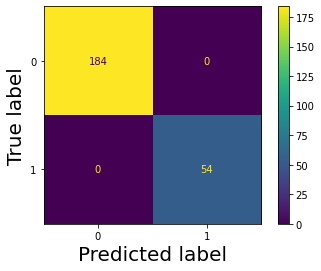

In [24]:
''' 
Instanciamos el Random Forest
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', 
max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, 
class_weight=None, ccp_alpha=0.0, max_samples=None)
Dejamos los parámetros default, sólo tocamos random_state
'''
forest=RandomForestClassifier(random_state=16, oob_score=True)
forest.fit(X_train, y_train)  
y_pred_forest=forest.predict(X_test)
# Veamos qué obtuvimos, a través de la matriz de confusión
print(f'tn, fp, fn, tp = {confusion_matrix(y_test, y_pred_forest).ravel()}')
# ahora más 'bonita'
conf1 = confusion_matrix(y_test, y_pred_forest)
ConfusionMatrixDisplay(conf1).plot()
print(f'Val_accuracy = {round(100*forest.score(X_test, y_test), 2)} %')
print(f'OOB Score = {round(100*(forest.oob_score_), 2)}%')

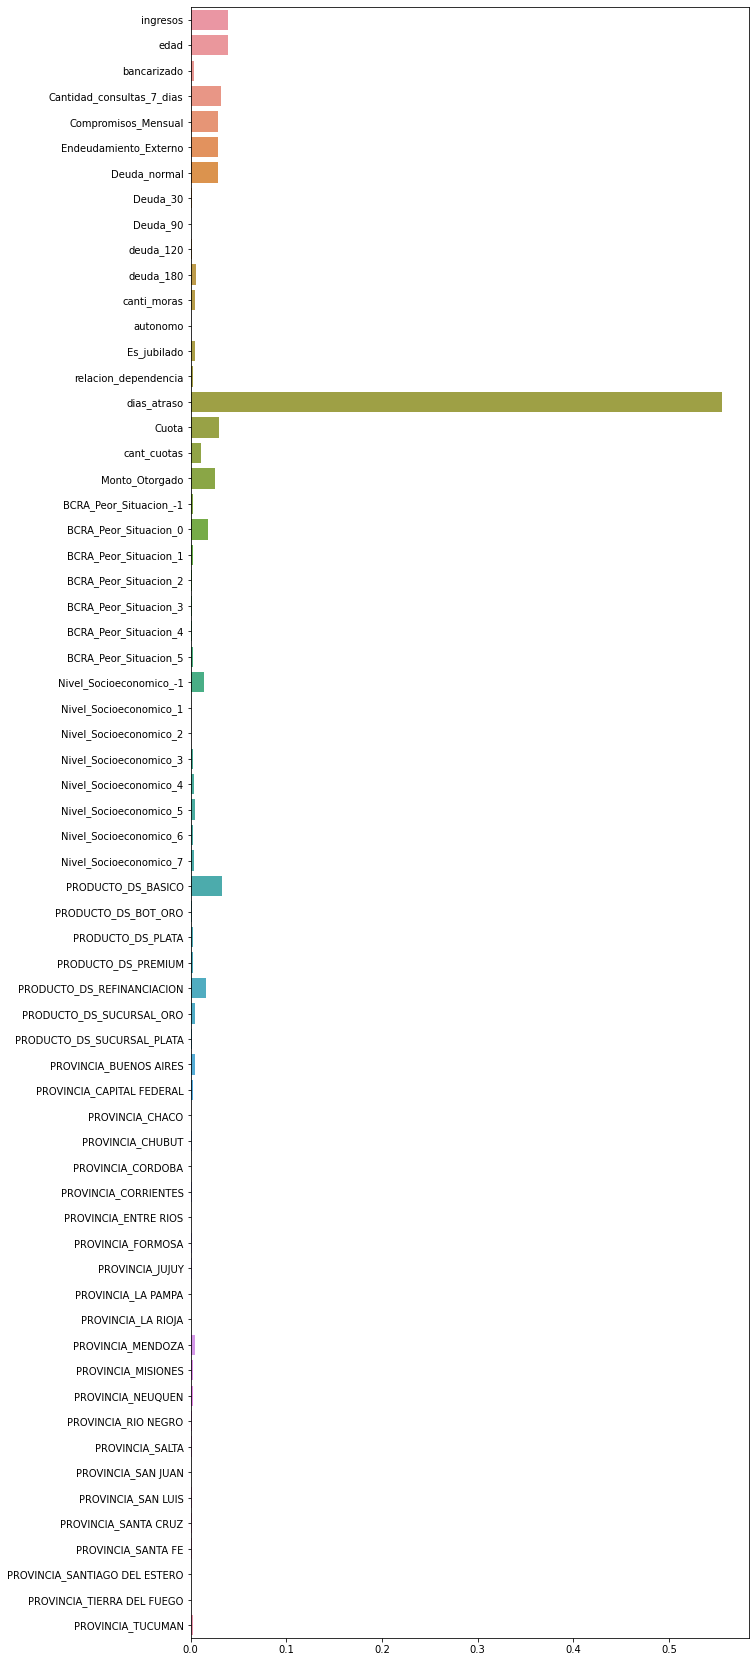

In [25]:
# Importancia de las características para el bosque
fi_forest=forest.feature_importances_
#print(fi_forest)
plt.figure(figsize = (10,30))
sns.barplot(y = (cred.drop(['moroso'],1)).columns, x = fi_forest)
plt.show()

In [26]:
# EPAAAAAAA 
# a ver el report...
print(classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       184
           1       1.00      1.00      1.00        54

    accuracy                           1.00       238
   macro avg       1.00      1.00      1.00       238
weighted avg       1.00      1.00      1.00       238



tn, fp, fn, tp = [184   0   0  54]
Val_accuracy_tree= 100.0 %


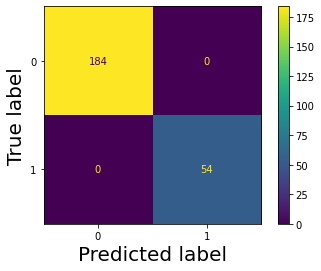

In [27]:
# Ahora veamos al arbolito...
# class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# class_weight=None, ccp_alpha=0.0)
# Lo dejamos que crezca por completo, sin poda

tree=DecisionTreeClassifier(random_state=16)  # x ahora no usamos class_weight
tree.fit(X_train, y_train)   
y_pred_tree=tree.predict(X_test)
# Veamos la matriz de confusión
print(f'tn, fp, fn, tp = {confusion_matrix(y_test, y_pred_tree).ravel()}')
# más 'bonita'
conf2 = confusion_matrix(y_test, y_pred_tree)
ConfusionMatrixDisplay(conf2).plot()
print(f'Val_accuracy_tree= {round(100*tree.score(X_test, y_test), 2)} %')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


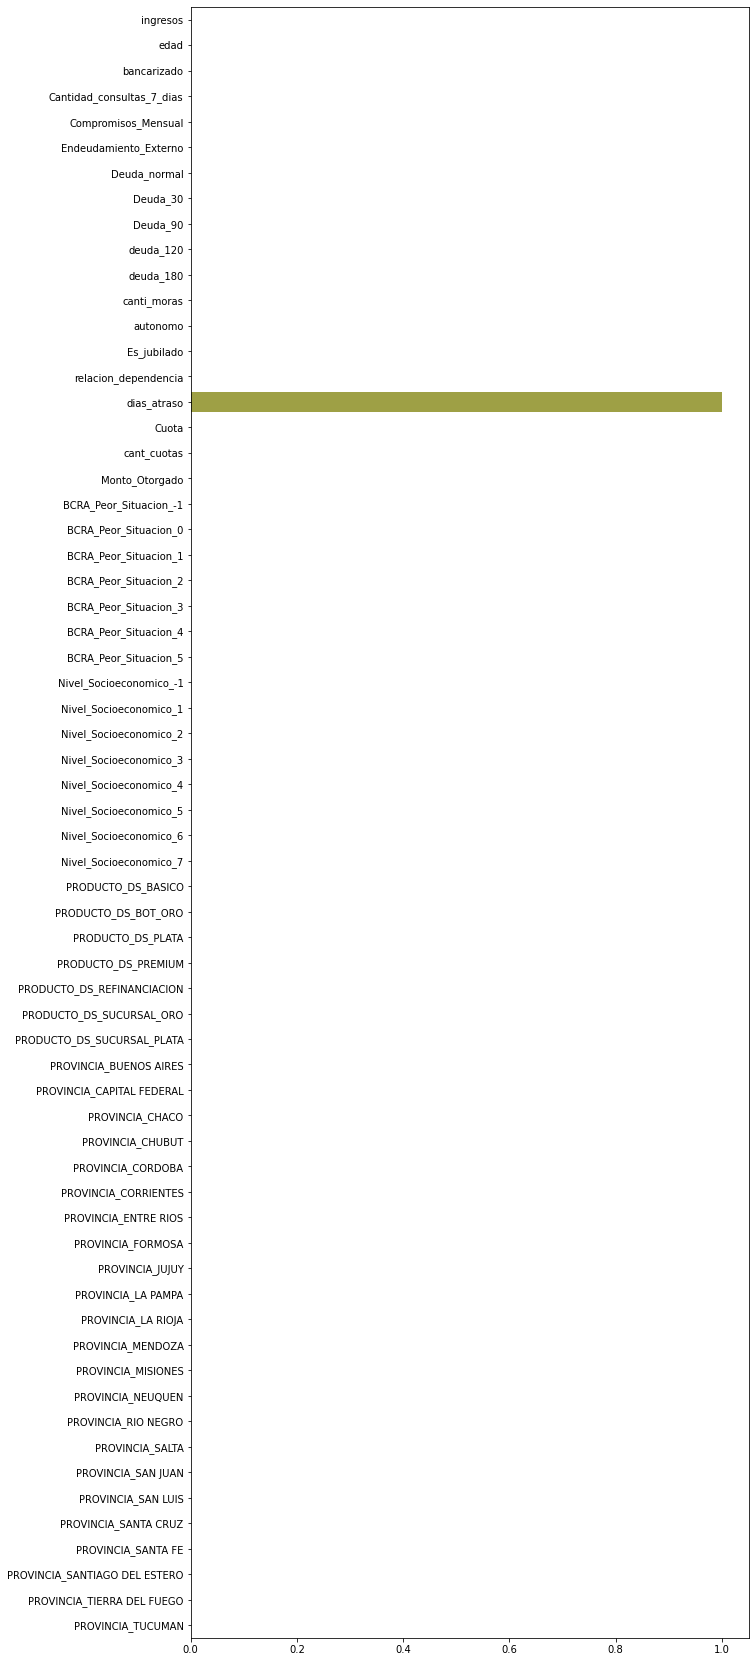

In [28]:
fi_tree=tree.feature_importances_
print(fi_tree)
plt.figure(figsize = (10,30))
sns.barplot(y = (cred.drop(['moroso'],1)).columns, x = fi_tree)
plt.show()

tn, fp, fn, tp = [921   0   0 269]
Val_accuracy= 100.0 %


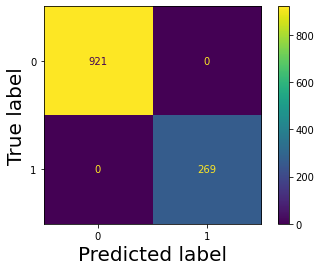

In [29]:
# Ahora usemos todo el dataset para entrenar a ambos modelos

tree.fit(X, y)
y_pred_tree_full=tree.predict(X)
print(f'tn, fp, fn, tp = {confusion_matrix(y, y_pred_tree_full).ravel()}')
conf_tree = confusion_matrix(y, y_pred_tree_full)
ConfusionMatrixDisplay(conf_tree).plot()
print(f'Val_accuracy= {round(100*tree.score(X, y), 2)} %')

tn, fp, fn, tp = [921   0   0 269]
Val_accuracy= 100.0 %
OOB Score= 99.83 %


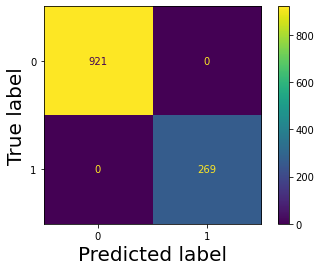

In [30]:
# ahora el bosque
forest.fit(X, y)
y_pred_forest_full=forest.predict(X)
print(f'tn, fp, fn, tp = {confusion_matrix(y, y_pred_forest_full).ravel()}')
conf_forest = confusion_matrix(y, y_pred_forest_full)
ConfusionMatrixDisplay(conf_forest).plot()
print(f'Val_accuracy= {round(100*forest.score(X, y), 2)} %')
print(f'OOB Score= {round(100*forest.oob_score_, 2)} %')

In [31]:
# Veamos la profundidad máxima del árbol 
print(f'Máxima profundidad: {tree.get_depth()}')    
print(f'Cantidad de hojas: {tree.get_n_leaves()}')


Máxima profundidad: 1
Cantidad de hojas: 2


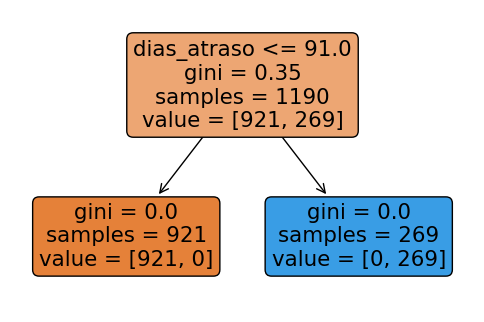

In [ ]:
#%%   GRÁFICO DEL ÁRBOL
# plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, 
# label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, 
# precision=3, ax=None, fontsize=None)

list_features=list((cred.drop(['moroso'],1)).columns)
plt.figure(dpi=100)
plot_tree(tree, max_depth=None, filled=True, rounded=True, feature_names=list_features)
plt.show()
plt.close()

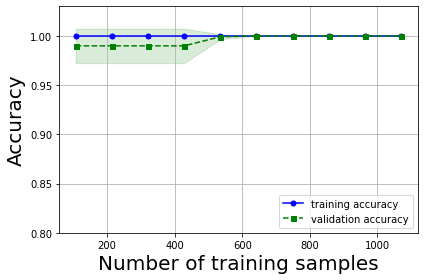

In [32]:
# Veamos la curva de aprendizaje del modelo de Árbol de Decisión
train_sizes, train_scores, test_scores = learning_curve(estimator=tree,
                               X=X,
                               y=y,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('tree.png', dpi=300)
plt.show()



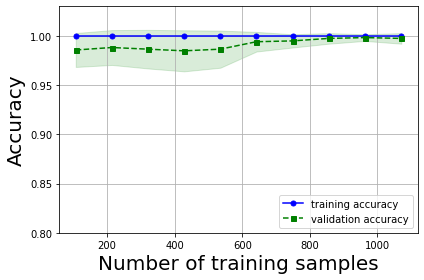

In [33]:
# Veamos la curva de aprendizaje del modelo de Random Forest
train_sizes, train_scores, test_scores = learning_curve(estimator=forest,
                               X=X,
                               y=y,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
#plt.savefig('tree.png', dpi=300)
plt.show()

